In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

data = pd.read_csv('data/stock_data/5_stocks.csv', parse_dates=['Date'], index_col='Date')
data.head()

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-07-05,1.66,15.27,NaN,NaN,NaN
2001-07-06,1.57,15.27,106.50,47.34,43.40
2001-07-09,1.62,15.81,104.72,48.25,43.36
2001-07-10,1.51,15.61,101.96,47.50,42.88
2001-07-11,1.61,15.34,103.85,48.85,42.48


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4000 non-null   float64
 1   AMZN    4000 non-null   float64
 2   IBM     4000 non-null   float64
 3   WMT     4000 non-null   float64
 4   XOM     4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB


In [5]:

# Resample to year-end prices and select the last price from each subperiod
annual_prices = data.resample('A').last()
annual_prices.head()

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-12-31,1.56,10.82,120.96,57.55,39.30
2002-12-31,1.02,18.89,77.50,50.51,34.94
2003-12-31,1.53,52.62,92.68,53.05,41.00
2004-12-31,4.60,44.29,98.58,52.82,51.26
2005-12-31,10.27,47.15,82.20,46.80,56.17


In [6]:

# Calculate annual returns
annual_returns = annual_prices.pct_change()

In [7]:

# Correlation matrix based on annual returns
correlations = annual_returns.corr()
print(correlations)

          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


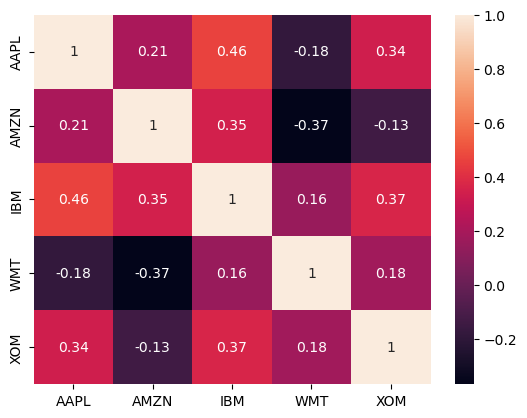

In [8]:

# Visualize heatmap
sns.heatmap(correlations, annot=True)
plt.show()